In [6]:
from importlib import reload

import universe
reload(universe)
from universe import *

import mass_function
reload(mass_function)
from mass_function import *

import sfr
reload(sfr)
from sfr import *

import luminosity_function
reload(luminosity_function)
from luminosity_function import *

import profiles
reload(profiles)
from profiles import *

import lim_specs
reload(lim_specs)
from lim_specs import *

import projection_kernel
reload(projection_kernel)
from projection_kernel import *

import p2d
reload(p2d)
from p2d import *

import p3d
reload(p3d)
from p3d import *

import p3d_rsd
reload(p3d_rsd)
from p3d_rsd import *

The goal of the project encompasses calculating the cross-spectrum between LIM and galaxy surveys. Previously, I had just worked with power spectra of galaxy distributions using an approximation for the 3D power spectrum, but now we are interested in implementing the LIM part of this project. In this notebook, I will compute the auto- and cross-sprectra of lines of interest, computing the actual 3D power spectrum of these observables and projecting it onto 2D.

### LIM auto

For LIM auto-spectrum, we can use the P3d calculation already established in the code, but because it was a calculation including RSD, we just modifed the code to "turn off" RSDs. 

In [2]:
u = UnivPlanck15()
massFunc = MassFuncTinker(u, save=False)

# spherexSpecs = LimSpecs(u, exp='SPHEREx')
# comapSpecs = LimSpecs(u, exp='COMAP')
# concertoSpecs = LimSpecs(u, exp='CONCERTO')
# hetdexSpecs = LimSpecs(u, exp='HETDEX')
# cdimSpecs = LimSpecs(u, exp='CDIM')

sfr = SfrMoster13Speagle14(u, massFunc, scatter=False, nProc=3, save=False)

lfCii = {}
lfCii['Popping16'] = LFCiiPopping16(u)

lfCO = {}
lfCO['Popping16'] = LFCOPopping16(u, 1)   # CO 1-0 transition

profLimLfCii = {}
for key in lfCii.keys():
   profLimLfCii[key] = ProfLIMLF(u, sfr, lfCii[key], trunc=4., a=1.)

profLimLfCO = {}
for key in lfCO.keys():
   profLimLfCO[key] = ProfLIMLF(u, sfr, lfCO[key], trunc=4., a=0.6)

pRsdCii = {}
for key in lfCii.keys():
   pRsdCii[key] = P3dRsdAuto(u, MassFunc=massFunc, Prof=profLimLfCii[key], rsd=False, save=False, nProc=3)

pRsdCO = {}
for key in lfCO.keys():
   pRsdCO[key] = P3dRsdAuto(u, MassFunc=massFunc, Prof=profLimLfCO[key], rsd=False, save=False, nProc=3)

Loading mass function and biases
Loading non-lin mass at z=0
Loading non-lin mass at z=0
Load the precomputed RSD power spectrum at z=1
Load the precomputed RSD power spectrum at z=1


[7.70957001e-07 7.70956998e-07 7.70956994e-07 7.70956989e-07
 7.70956983e-07 7.70956976e-07 7.70956966e-07 7.70956954e-07
 7.70956939e-07 7.70956920e-07 7.70956896e-07 7.70956866e-07
 7.70956828e-07 7.70956780e-07 7.70956720e-07 7.70956644e-07
 7.70956549e-07 7.70956429e-07 7.70956278e-07 7.70956088e-07
 7.70955849e-07 7.70955548e-07 7.70955168e-07 7.70954691e-07
 7.70954090e-07 7.70953333e-07 7.70952381e-07 7.70951181e-07
 7.70949671e-07 7.70947771e-07 7.70945378e-07 7.70942366e-07
 7.70938573e-07 7.70933799e-07 7.70927789e-07 7.70920223e-07
 7.70910698e-07 7.70898707e-07 7.70883612e-07 7.70864610e-07
 7.70840690e-07 7.70810579e-07 7.70772676e-07 7.70724966e-07
 7.70664915e-07 7.70589333e-07 7.70494209e-07 7.70374501e-07
 7.70223870e-07 7.70034352e-07 7.69795942e-07 7.69496089e-07
 7.69119048e-07 7.68645096e-07 7.68049553e-07 7.67301589e-07
 7.66362758e-07 7.65185247e-07 7.63709763e-07 7.61863065e-07
 7.59555113e-07 7.56675860e-07 7.53091800e-07 7.48642413e-07
 7.43136854e-07 7.363513

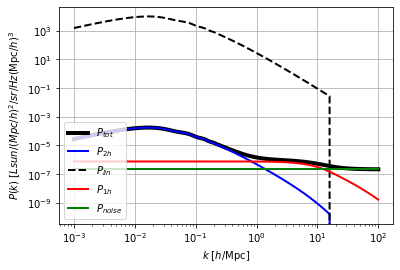

In [3]:
pRsdCii['Popping16'].plotP(z=1)

[1.54538015e-11 1.54538014e-11 1.54538014e-11 1.54538013e-11
 1.54538013e-11 1.54538012e-11 1.54538011e-11 1.54538009e-11
 1.54538008e-11 1.54538006e-11 1.54538003e-11 1.54538000e-11
 1.54537995e-11 1.54537990e-11 1.54537984e-11 1.54537975e-11
 1.54537965e-11 1.54537951e-11 1.54537935e-11 1.54537914e-11
 1.54537887e-11 1.54537854e-11 1.54537812e-11 1.54537759e-11
 1.54537693e-11 1.54537609e-11 1.54537504e-11 1.54537372e-11
 1.54537205e-11 1.54536995e-11 1.54536730e-11 1.54536398e-11
 1.54535979e-11 1.54535451e-11 1.54534787e-11 1.54533951e-11
 1.54532899e-11 1.54531574e-11 1.54529906e-11 1.54527807e-11
 1.54525164e-11 1.54521837e-11 1.54517649e-11 1.54512377e-11
 1.54505741e-11 1.54497388e-11 1.54486874e-11 1.54473643e-11
 1.54456991e-11 1.54436036e-11 1.54409671e-11 1.54376502e-11
 1.54334782e-11 1.54282317e-11 1.54216359e-11 1.54133468e-11
 1.54029342e-11 1.53898613e-11 1.53734600e-11 1.53529003e-11
 1.53271557e-11 1.52949609e-11 1.52547654e-11 1.52046811e-11
 1.51424265e-11 1.506527

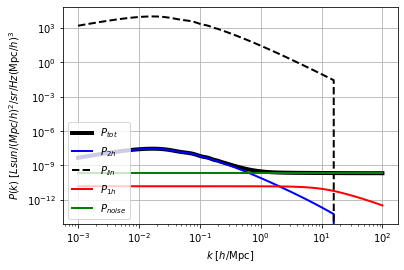

In [4]:
pRsdCO['Popping16'].plotP(z=1)

### Galaxy auto

In [8]:
u = UnivPlanck15()
massFunc = MassFuncTinker(u, save=False)
profNFW = ProfNFW(u)
p3d_d = P3dAuto(u, massFunc, profNFW, save=False)

Loading mass function and biases
Loading non-lin mass at z=0


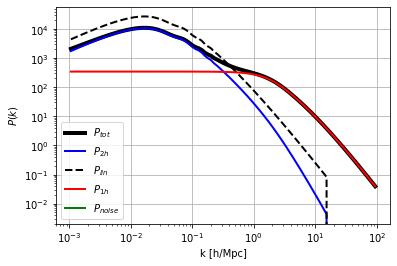

In [3]:
p3d_d.plotP()

<Figure size 432x288 with 0 Axes>

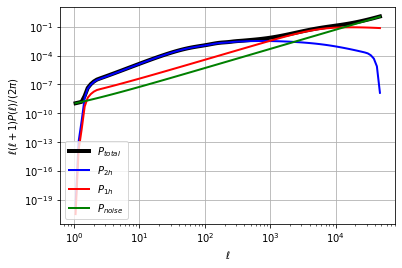

In [13]:
w_bin = WeightTracerLSSTBins(u, zphMin=0.75, zphMax=1.25, name='lsstbins')
p2d_lsstbin = P2dAuto(u, p3d_d, w_bin, pNoise=lambda l:1./w_bin.ng, nProc=3, save=True)
p2d_lsstbin.plotP()


### Galaxy-LIM cross

The galaxy p3d calculation was modified to be able to take in the first profile as a LIM profile. Let's test the modification:

In [3]:
u = UnivPlanck15()
massFunc = MassFuncTinker(u, save=False)

# LIM
lfCii = LFCiiPopping16(u)
sfr = SfrMoster13Speagle14(u, massFunc, scatter=False, nProc=3, save=False)
profLimLfCii = ProfLIMLF(u, sfr, lfCii, trunc=4., a=1.)

# galaxy
profNFW = ProfNFW(u)

# p3d (first profile has to be the LIM one)
p3d_Cii_d = P3dCross(u, massFunc, Prof1=profLimLfCii, Prof2=profNFW, LIMxGal=True, save=False)

Loading mass function and biases
Loading non-lin mass at z=0
Loading non-lin mass at z=0


[3.82098182e-05 3.82098182e-05 3.82098181e-05 3.82098179e-05
 3.82098178e-05 3.82098176e-05 3.82098173e-05 3.82098170e-05
 3.82098166e-05 3.82098162e-05 3.82098155e-05 3.82098148e-05
 3.82098138e-05 3.82098126e-05 3.82098111e-05 3.82098092e-05
 3.82098068e-05 3.82098038e-05 3.82098000e-05 3.82097953e-05
 3.82097893e-05 3.82097818e-05 3.82097724e-05 3.82097606e-05
 3.82097458e-05 3.82097271e-05 3.82097037e-05 3.82096743e-05
 3.82096374e-05 3.82095910e-05 3.82095327e-05 3.82094596e-05
 3.82093676e-05 3.82092522e-05 3.82091072e-05 3.82089250e-05
 3.82086962e-05 3.82084089e-05 3.82080479e-05 3.82075946e-05
 3.82070251e-05 3.82063099e-05 3.82054116e-05 3.82042833e-05
 3.82028661e-05 3.82010863e-05 3.81988508e-05 3.81960433e-05
 3.81925173e-05 3.81880893e-05 3.81825287e-05 3.81755461e-05
 3.81667786e-05 3.81557709e-05 3.81419520e-05 3.81246066e-05
 3.81028383e-05 3.80755255e-05 3.80412653e-05 3.79983053e-05
 3.79444598e-05 3.78770068e-05 3.77925652e-05 3.76869460e-05
 3.75549788e-05 3.739031

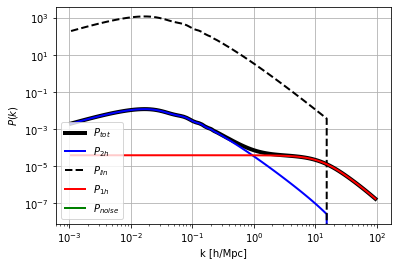

In [4]:
p3d_Cii_d.plotP(z=5)

For narrow redshift bins, we can use the following approximation to calculate the 2D power spectrum:


$C_{\ell} \approx \mathcal{V}^{-1} P_{\ell}$ where $\mathcal{V}=\chi^2_0 \Delta \chi$. 